In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets

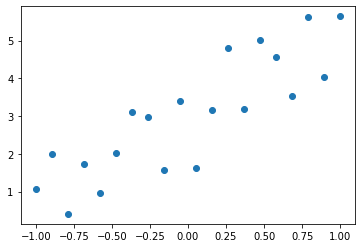

In [105]:
x = np.linspace(-1,1,20)
y = np.array(2 * x + 3 + np.random.normal(size=x.shape[0])).reshape(-1,1)
plt.scatter(x, y)
X = np.ones((x.shape[0],2))
X[:,1] = x

The cost function of linear regression is $$f=\sum_{i=1}^{N}(y_i-\sum_{j=0}^{p}\beta_j x_{ij})^2$$

In [112]:
X_t = np.transpose(X)
A = np.linalg.inv(np.matmul(X_t, X))
print(np.matmul(np.matmul(A, X_t), y))

[[3.02011639]
 [2.16375715]]


In [98]:
def coordinate_descent_linear_regression(β, X, y, num_iter, α):
    num_features = X.shape[1]
    β_hist = np.zeros((num_iter, num_features), dtype=float)
    for i in range(num_iter):
        # dfdβj=Xj*(βX-y)
        # βj := βj - α*df/dβj
        for j in range(num_features):
            gradient = np.dot(X[:,j], (np.matmul(X,β) - y))
            β[j,0] = β[j,0] - α * gradient 
            β_hist[i,j] = β[j,0]
    return [β, β_hist]

In [114]:
β_init = np.array([3.5,4], dtype=float).reshape(-1,1)
α = 0.03
num_iter = 50
[β_final, β_hist] = coordinate_descent_linear_regression(β, X, y, num_iter, α)
print(β_final)

[[3.02011639]
 [2.16376406]]


[[ 1.51601852]
 [-4.61733074]]


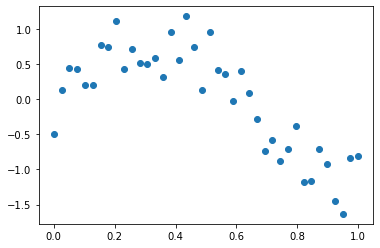

In [116]:
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
y_noise = y_noise - y_noise.mean()
plt.scatter(x, y_noise)
X = np.vstack((2*x,x**2)).T
β_init = np.array([4,-4.]).reshape(-1,1)
α = 0.009
[β_final, β_hist] = coordinate_descent_linear_regression(β_init, X, y_noise, num_iter, α)
print(β_final)

In [23]:
def soft_max(ρ, λ):
    sign = 0
    if ρ > 0:
        sign = 1
    elif ρ < 0:
        sign = -1
    return sign * max(0, abs(ρ)-λ)
    
def coordinate_descent_lasso(β, λ, X, y, num_iter, intercept=False):
    num_features = X.shape[1]
    X = X / (np.linalg.norm(X, axis=0)) # normalize X by feature
    β_hist = np.zeros((num_iter, num_features), dtype=float)
    for i in range(num_iter):
        # https://xavierbourretsicotte.github.io/lasso_implementation.html
        for j in range(num_features):
            Xj = X[:,j].reshape(-1,1)
            y_predict = X @ β
            ρ = Xj.T @ (y - y_predict + β[j,0]*Xj)
            # do not regularize the intercept (constant term)
            if intercept == True:
                β[j,0] = soft_max(ρ, λ) if j != 0 else ρ
            else:
                β[j,0] = soft_max(ρ, λ)
            β_hist[i,j] = β[j,0]
    return [β.flatten(), β_hist]

TypeError: cannot unpack non-iterable AxesSubplot object

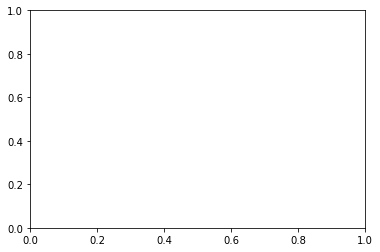

In [24]:
num_iter = 100
diabetes = datasets.load_diabetes()
X = diabetes.data
num_features = X.shape[1]
y = diabetes.target.reshape(-1,1)
β_init = np.ones((num_features,1))
λ = np.logspace(0,4,300)/10
β_list = np.zeros((len(λ),num_features))
for idx, l in enumerate(λ):
    [β, _] = coordinate_descent_lasso(β_init, l, X, y, num_iter, intercept=False)
    β_list[idx,:] = β


(0.06309573444801933, 1584.893192461114, -849.8147108555938, 820.6104516733532)

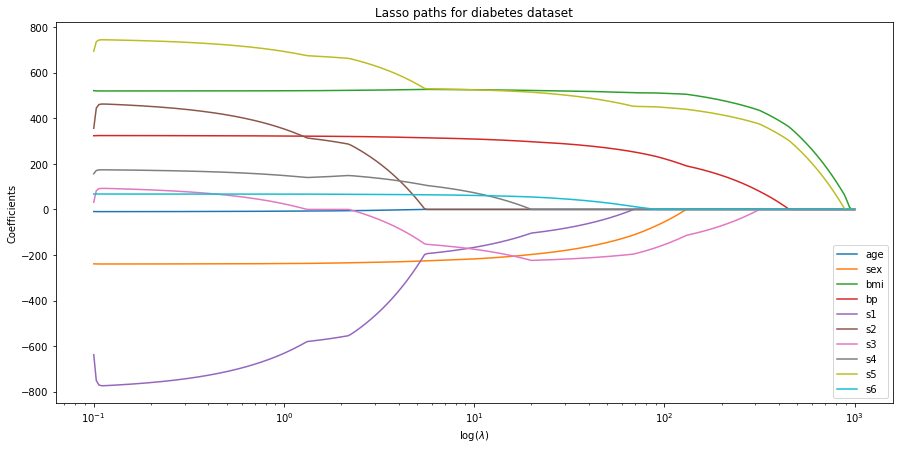

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
for i in range(num_features):
    ax.plot(λ, β_list[:,i], label=diabetes.feature_names[i])
ax.set_xscale('log')
ax.set_xlabel('log($\\lambda$)')
ax.set_ylabel('Coefficients')
plt.title('Lasso paths for diabetes dataset')
plt.legend()
plt.axis('tight')